<a href="https://colab.research.google.com/github/m4riod14z/SkinDiseasesRNC/blob/main/EfficientNetV2B0_B%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, itertools
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

plt.rcParams["figure.dpi"] = 120
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE = "/content/drive/MyDrive/SkinDiseasesRNC/Dataset"
TRAIN_DIR = os.path.join(BASE, "train")
TEST_DIR  = os.path.join(BASE, "test")

print("Train existe:", os.path.isdir(TRAIN_DIR))
print("Test  existe:", os.path.isdir(TEST_DIR))

Train existe: True
Test  existe: True


In [ ]:
IMG_SIZE = (384, 384)
BATCH = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR, image_size=IMG_SIZE, batch_size=BATCH,
    validation_split=0.2, subset="training", seed=SEED
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR, image_size=IMG_SIZE, batch_size=BATCH,
    validation_split=0.2, subset="validation", seed=SEED
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR, image_size=IMG_SIZE, batch_size=BATCH, shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Clases (orden):", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)

Found 1045 files belonging to 4 classes.
Using 836 files for training.
Found 1045 files belonging to 4 classes.
Using 209 files for validation.
Found 447 files belonging to 4 classes.
Clases (orden): ['Acne', 'Atopic_Dermatitis', 'Psoriasis', 'Rosacea']


In [ ]:
base = keras.applications.EfficientNetV2B0(
    include_top=False, weights="imagenet", input_shape=IMG_SIZE + (3,)
)
base.trainable = False

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = keras.applications.efficientnet_v2.preprocess_input(inputs)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs, outputs, name="EfficientNetV2B0_basico")
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "EfficientNetV2B0_basico"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 384, 384, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 12, 12, 1280)   │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,083,796 (23.21 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
)

Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.5333 - loss: 1.0411 - val_accuracy: 0.8325 - val_loss: 0.4769
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.7987 - loss: 0.5330 - val_accuracy: 0.8134 - val_loss: 0.4019
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.8486 - loss: 0.4029 - val_accuracy: 0.8612 - val_loss: 0.3700
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.8690 - loss: 0.3747 - val_accuracy: 0.8278 - val_loss: 0.3795
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.9016 - loss: 0.3021 - val_accuracy: 0.8852 - val_loss: 0.3411
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.9130 - loss: 0.2337 - val_accuracy: 0.8517 - val_loss: 0.3681
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9268 - loss: 0.2075 - val_accuracy: 0.8708 - val_loss: 0.3557
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.9255 - loss: 0.1933 - val_accuracy: 0.8708 - v

In [ ]:
y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)

In [ ]:
probs = model.predict(test_ds, verbose=0)
y_pred = probs.argmax(axis=1)

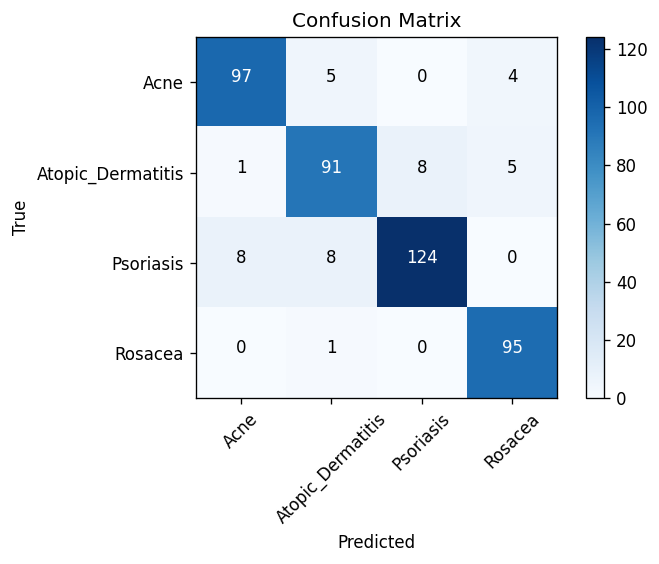

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure()
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()
ticks = np.arange(num_classes)
plt.xticks(ticks, class_names, rotation=45)
plt.yticks(ticks, class_names)
th = cm.max() / 2.0
for i, j in itertools.product(range(num_classes), range(num_classes)):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > th else "black")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

                   precision    recall  f1-score   support

             Acne     0.9151    0.9151    0.9151       106
Atopic_Dermatitis     0.8667    0.8667    0.8667       105
        Psoriasis     0.9394    0.8857    0.9118       140
          Rosacea     0.9135    0.9896    0.9500        96

         accuracy                         0.9105       447
        macro avg     0.9087    0.9143    0.9109       447
     weighted avg     0.9110    0.9105    0.9102       447



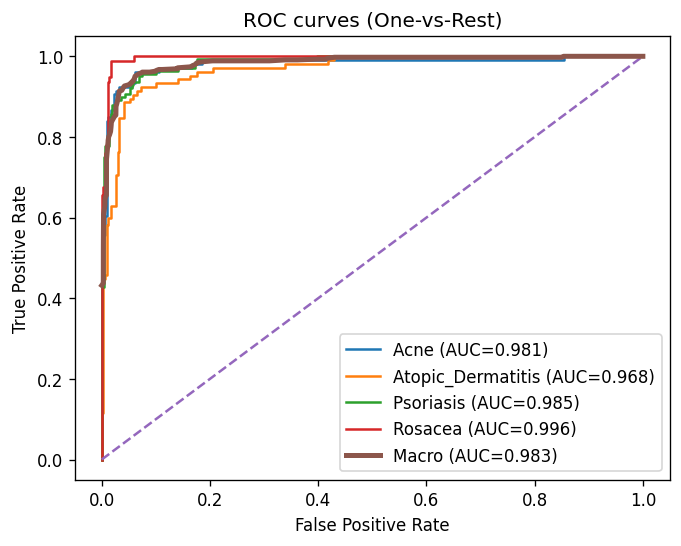

In [ ]:
y_bin = label_binarize(y_true, classes=list(range(num_classes)))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= num_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# Graficar
plt.figure()
for i, name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f"{name} (AUC={roc_auc[i]:.3f})")
plt.plot([0, 1], [0, 1], '--')
plt.plot(all_fpr, mean_tpr, label=f"Macro (AUC={roc_auc['macro']:.3f})", linewidth=3)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves (One-vs-Rest)")
plt.legend()
plt.show()